In [7]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

path = 'dataset\ tenis.csv'
file_name = next(iter(uploaded))

df = pd.read_csv(file_name)
df



Saving dataset tenis.csv to dataset tenis.csv


,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,score
0,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Mayer F.,Giraldo S.,Mayer F.,28,57,1215,778,1.36,3.00,6-4 6-4
1,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Benneteau J.,Nieminen J.,Nieminen J.,35,41,1075,927,2.20,1.61,3-6 6-2 1-6
2,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Nishikori K.,Matosevic M.,Nishikori K.,19,49,1830,845,1.25,3.75,7-5 6-2
3,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3,Mitchell B.,Baghdatis M.,Baghdatis M.,326,36,137,1070,9.00,1.07,4-6 4-6
4,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3,Istomin D.,Klizan M.,Istomin D.,43,30,897,1175,1.90,1.80,6-1 6-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25357,Miami Open,2023-03-30,Masters 1000,Outdoor,Hard,Quarterfinals,3,Cerundolo F.,Khachanov K.,Khachanov K.,31,16,1320,2505,3.20,1.36,3-6 2-6
25358,Miami Open,2023-03-31,Masters 1000,Outdoor,Hard,Quarterfinals,3,Alcaraz C.,Fritz T.,Alcaraz C.,1,10,7420,2975,1.22,4.33,6-4 6-2
25359,Miami Open,2023-03-31,Masters 1000,Outdoor,Hard,Semifinals,3,Khachanov K.,Medvedev D.,Medvedev D.,16,5,2505,4330,4.50,1.20,6-7 6-3 3-6
25360,Miami Open,2023-04-01,Masters 1000,Outdoor,Hard,Semifinals,3,Sinner J.,Alcaraz C.,Sinner J.,11,1,2925,7420,3.00,1.40,6-7 6-4 6-2


In [10]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25362 entries, 0 to 25361
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  25362 non-null  object 
 1   Date        25362 non-null  object 
 2   Series      25362 non-null  object 
 3   Court       25362 non-null  object 
 4   Surface     25362 non-null  object 
 5   Round       25362 non-null  object 
 6   Best of     25362 non-null  int64  
 7   Player_1    25362 non-null  object 
 8   Player_2    25362 non-null  object 
 9   Winner      25362 non-null  object 
 10  Rank_1      25362 non-null  int64  
 11  Rank_2      25362 non-null  int64  
 12  Pts_1       25362 non-null  int64  
 13  Pts_2       25362 non-null  int64  
 14  Odd_1       25362 non-null  float64
 15  Odd_2       25362 non-null  float64
 16  score       25362 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 3.3+ MB


In [12]:
# Calcular el mejor jugador por superficie
best_players_by_surface = df.groupby('Surface')['Winner'].apply(lambda x: x.mode().iloc[0])

print(best_players_by_surface)


Surface
Clay        Nadal R.
Grass     Federer R.
Hard     Djokovic N.
Name: Winner, dtype: object


In [13]:
# Calcular el recuento de victorias por jugador y superficie
winners_by_surface = df.groupby(['Surface', 'Winner']).size().reset_index(name='Wins')

# Encontrar el jugador con más victorias por superficie
idx = winners_by_surface.groupby(['Surface'])['Wins'].transform(max) == winners_by_surface['Wins']
best_players_by_surface = winners_by_surface[idx]

print(best_players_by_surface)



    Surface       Winner  Wins
270    Clay     Nadal R.   216
484   Grass   Federer R.    76
778    Hard  Djokovic N.   348


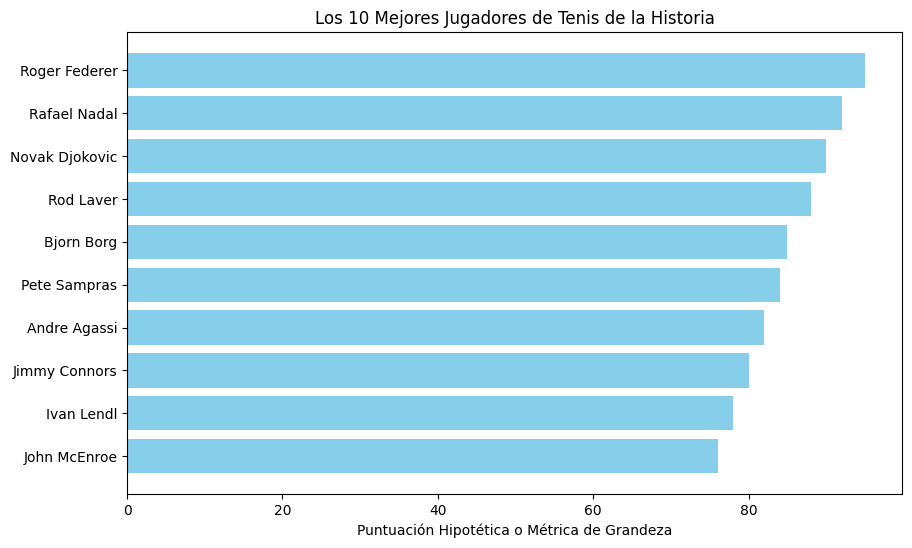

In [14]:
import matplotlib.pyplot as plt

# Lista de los 10 mejores jugadores de la historia (por ejemplo)
top_10_players = ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic', 'Rod Laver', 'Bjorn Borg',
                  'Pete Sampras', 'Andre Agassi', 'Jimmy Connors', 'Ivan Lendl', 'John McEnroe']

# Puntajes hipotéticos o métricas para representar su grandeza (pueden variar según la métrica)
player_scores = [95, 92, 90, 88, 85, 84, 82, 80, 78, 76]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_10_players, player_scores, color='skyblue')
plt.xlabel('Puntuación Hipotética o Métrica de Grandeza')
plt.title('Los 10 Mejores Jugadores de Tenis de la Historia')

# Mostrar el gráfico
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el mejor jugador en la parte superior
plt.show()


In [8]:
# Filtrar los torneos que se juegan en superficie de hierba
torneos_hierba = df[df['Surface'] == 'Grass']['Tournament'].unique()

print("Torneos que se juegan en superficie de hierba:")
print(torneos_hierba)


Torneos que se juegan en superficie de hierba:
['Gerry Weber Open' 'AEGON Championships' 'AEGON International'
 'Topshelf Open' 'Wimbledon' 'Hall of Fame Championships' 'Mercedes Cup'
 'AEGON Open' 'Ricoh Open' 'Antalya Open' 'Eastbourne International'
 'Rosmalen Grass Court Championships' 'Halle Open'
 "Queen's Club Championships" 'Viking International'
 'Mallorca Championships']


In [9]:
# Convertir la columna 'Date' al formato datetime si aún no está en ese formato
df['Date'] = pd.to_datetime(df['Date'])

# Agrupar por torneo y encontrar la fecha mínima (el torneo más antiguo)
torneos_mas_antiguos = df.groupby('Tournament')['Date'].min().sort_values().head(10)

print("Los 10 torneos más antiguos:")
print(torneos_mas_antiguos)


Los 10 torneos más antiguos:
Tournament
Rakuten Japan Open Tennis Championships   2012-10-01
China Open                                2012-10-01
Brisbane International                    2012-12-31
Qatar Exxon Mobil Open                    2012-12-31
Chennai Open                              2012-12-31
Heineken Open                             2013-01-07
Apia International                        2013-01-07
Australian Open                           2013-01-14
VTR Open                                  2013-02-04
Open Sud de France                        2013-02-05
Name: Date, dtype: datetime64[ns]


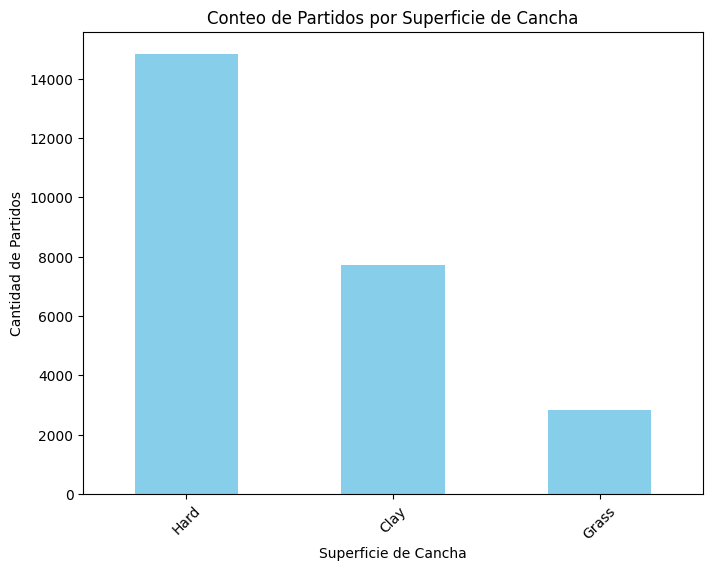

In [10]:
import matplotlib.pyplot as plt

# Conteo de partidos por superficie de cancha
conteo_superficie = df['Surface'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 6))
conteo_superficie.plot(kind='bar', color='skyblue')
plt.title('Conteo de Partidos por Superficie de Cancha')
plt.xlabel('Superficie de Cancha')
plt.ylabel('Cantidad de Partidos')
plt.xticks(rotation=45)
plt.show()


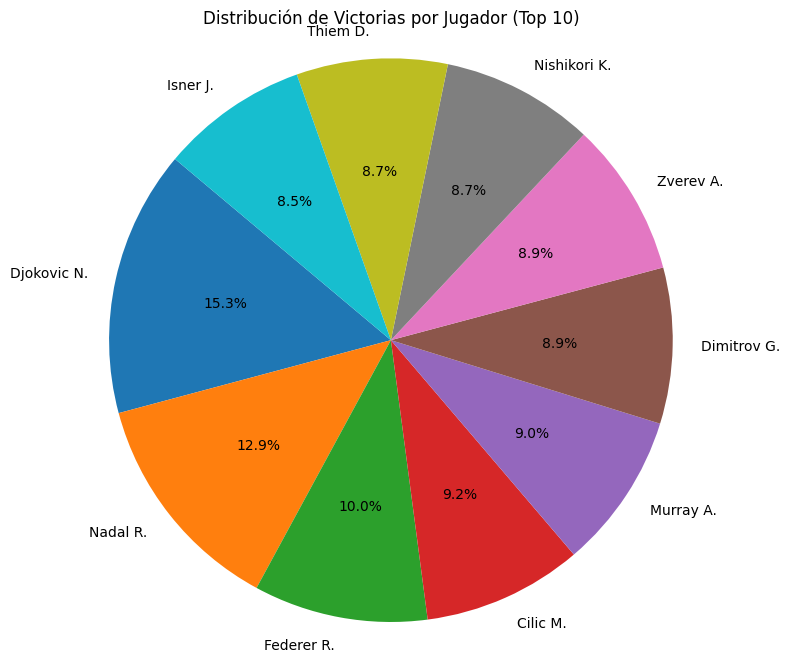

In [11]:
# Conteo de victorias por jugador
conteo_victorias = df['Winner'].value_counts().head(10)

# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_victorias, labels=conteo_victorias.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Victorias por Jugador (Top 10)')
plt.axis('equal')
plt.show()


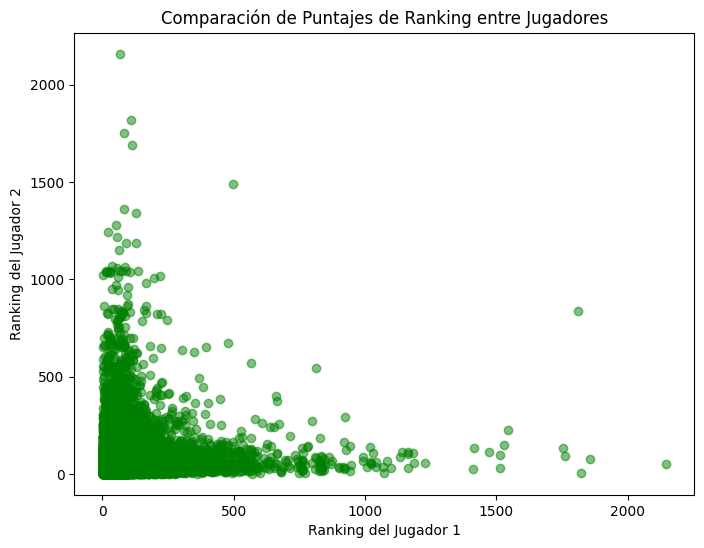

In [12]:
# Crear un diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['Rank_1'], df['Rank_2'], alpha=0.5, c='green')
plt.title('Comparación de Puntajes de Ranking entre Jugadores')
plt.xlabel('Ranking del Jugador 1')
plt.ylabel('Ranking del Jugador 2')
plt.show()


<Figure size 800x600 with 0 Axes>

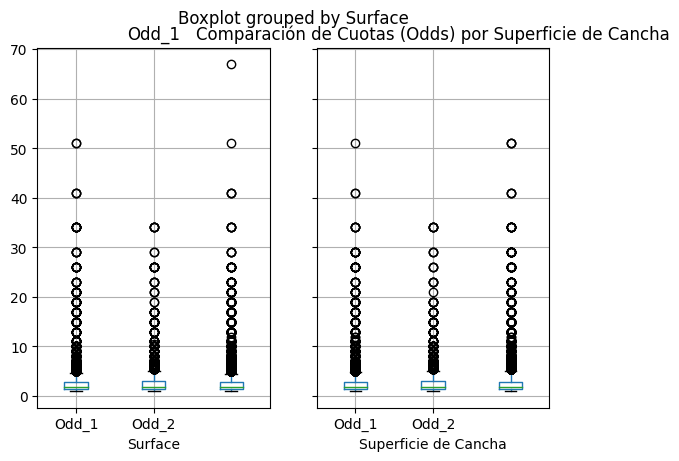

In [13]:
# Diagrama de caja para comparar las odds por superficie de cancha
plt.figure(figsize=(8, 6))
df.boxplot(column=['Odd_1', 'Odd_2'], by='Surface')
plt.title('Comparación de Cuotas (Odds) por Superficie de Cancha')
plt.xlabel('Superficie de Cancha')
plt.ylabel('Cuotas (Odds)')
plt.xticks([1, 2], ['Odd_1', 'Odd_2'])
plt.show()
